## Star Wars Survey

**About the Project**

While waiting for `Star Wars: The Force Awakens` to come out, the team at `FiveThirtyEight` became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that `The Empire Strikes Back` is clearly the best in the series?

For these reasons the team conducted a survey using the online tool SurveyMonkey.

**Aim of the Project**

- To see if `The Empire Strikes Back` is really the best in the series based on the responses provided in the survey.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Star Wars Survey\StarWars.csv", encoding='latin1')

In [3]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

We can clearly see the issue with this dataset, it is how the survey questions were put in a csv file, and from inspecting the first five rows of the dataframe, we can see that the questions are the column names, any column that is named `Unnamed: #` has no name and it is just includes choices to the questions before it.

## Data Cleaning

To make this dataset ready for analysis, we need first to change the column names, I will go with putting the choices of the questions as the column names.

In [5]:
q1 = ['Which of the following Star Wars films have you seen? Please select all that apply.','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
q2 = ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']
q3 = ['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28']

rename1 = {col: f"q1: {name}" for col, name in data.iloc[0][q1].to_dict().items()}

data.rename(columns=rename1, inplace=True)

In [6]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,q1: Star Wars: Episode I The Phantom Menace,q1: Star Wars: Episode II Attack of the Clones,q1: Star Wars: Episode III Revenge of the Sith,q1: Star Wars: Episode IV A New Hope,q1: Star Wars: Episode V The Empire Strikes Back,q1: Star Wars: Episode VI Return of the Jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
# Selecting only the rows were the respondents watched any film in the Star Wars franchise
data = data[data['Have you seen any of the 6 films in the Star Wars franchise?'] != 'No']

The first question asks the respondents to choose the movies that they watched from the series, so to clean that I will put the answers as the column names, and change the values in each column to binary values (0, 1), 0 will be No, 1 will be Yes.

In [8]:
for col in data.columns:
    if col.startswith('q'):  
        data[col] = data[col].apply(lambda x: 0 if pd.isna(x) else 1)

In [9]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,q1: Star Wars: Episode I The Phantom Menace,q1: Star Wars: Episode II Attack of the Clones,q1: Star Wars: Episode III Revenge of the Sith,q1: Star Wars: Episode IV A New Hope,q1: Star Wars: Episode V The Empire Strikes Back,q1: Star Wars: Episode VI Return of the Jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,1,1,1,1,1,1,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,1,1,1,1,1,1,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3.292765e+09,Yes,No,1,1,1,0,0,0,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,1,1,1,1,1,1,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,1,1,1,1,1,1,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
rename2 = {col: f"q2: {name}" for col, name in data.iloc[0][q2].to_dict().items()}
rename3 = {col: f"q3: {name}" for col, name in data.iloc[0][q3].to_dict().items()}

data.rename(columns=rename2, inplace=True)
data.rename(columns=rename3, inplace=True)

sws = data.copy()

I will remove the columns that we don't need, remove the first row, and reset the index

In [11]:
columns_to_drop = ['Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Universe?æ', 'Do you consider yourself to be a fan of the Star Trek franchise?', 'Household Income', 'Education', 'Location (Census Region)']
sws.drop(columns_to_drop, axis=1, inplace=True)
sws.drop(0, inplace=True)
sws.reset_index(drop=True, inplace=True)

In [12]:
sws.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,q1: Star Wars: Episode I The Phantom Menace,q1: Star Wars: Episode II Attack of the Clones,q1: Star Wars: Episode III Revenge of the Sith,q1: Star Wars: Episode IV A New Hope,q1: Star Wars: Episode V The Empire Strikes Back,q1: Star Wars: Episode VI Return of the Jedi,q2: Star Wars: Episode I The Phantom Menace,...,q3: Darth Vader,q3: Lando Calrissian,q3: Boba Fett,q3: C-3P0,q3: R2 D2,q3: Jar Jar Binks,q3: Padme Amidala,q3: Yoda,Gender,Age
0,3.292880e+09,Yes,Yes,1,1,1,1,1,1,3,...,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29
1,3.292765e+09,Yes,No,1,1,1,0,0,0,1,...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29
2,3.292763e+09,Yes,Yes,1,1,1,1,1,1,5,...,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29
3,3.292731e+09,Yes,Yes,1,1,1,1,1,1,5,...,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male,18-29
4,3.292719e+09,Yes,Yes,1,1,1,1,1,1,1,...,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Male,18-29


Now I will change the values of question 3 to be a scaled values from 1-5 with 1 being the lowest, 5 the highest, and 0 means N/A.

In [16]:
values = {'Unfamiliar (N/A)': '0', 'very unfavorably': '1',
          'Somewhat unfavorably': '2', 'Neither favorably nor unfavorably (neutral)': '3', 
          'Somewhat favorably': '4', 'Very favorably': '5'}

for col in sws.columns:
    if col.startswith('q3'):
        sws[col] = sws[col].map(values)

In [17]:
sws.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,q1: Star Wars: Episode I The Phantom Menace,q1: Star Wars: Episode II Attack of the Clones,q1: Star Wars: Episode III Revenge of the Sith,q1: Star Wars: Episode IV A New Hope,q1: Star Wars: Episode V The Empire Strikes Back,q1: Star Wars: Episode VI Return of the Jedi,q2: Star Wars: Episode I The Phantom Menace,...,q3: Darth Vader,q3: Lando Calrissian,q3: Boba Fett,q3: C-3P0,q3: R2 D2,q3: Jar Jar Binks,q3: Padme Amidala,q3: Yoda,Gender,Age
0,3.292880e+09,Yes,Yes,1,1,1,1,1,1,3,...,5,0,0,5,5,5,5,5,Male,18-29
1,3.292765e+09,Yes,No,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,Male,18-29
2,3.292763e+09,Yes,Yes,1,1,1,1,1,1,5,...,5,4,2,5,5,5,5,5,Male,18-29
3,3.292731e+09,Yes,Yes,1,1,1,1,1,1,5,...,4,3,5,4,4,NaN,4,4,Male,18-29
4,3.292719e+09,Yes,Yes,1,1,1,1,1,1,1,...,5,3,4,4,4,4,3,5,Male,18-29


## Data Analysis and Visualization

As we removed the questions and only kept the choices of each question, let's clarify what the questions are.

**Questions**

- **Question 1:** Which of the following Star Wars films have you seen? Please select all that apply.
- **Question 2:** Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
- **Question 3:** Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

**What is the Star Wars movie watched by most people?**

In [22]:
most_watched = {}

for col in sws.columns:
    if col.startswith('q1'):
        watched = sws[col].value_counts()
        watched = watched[1]
        most_watched[col] = watched

In [26]:
print(most_watched)

{'q1: Star Wars: Episode I  The Phantom Menace': 673, 'q1: Star Wars: Episode II  Attack of the Clones': 571, 'q1: Star Wars: Episode III  Revenge of the Sith': 550, 'q1: Star Wars: Episode IV  A New Hope': 607, 'q1: Star Wars: Episode V The Empire Strikes Back': 758, 'q1: Star Wars: Episode VI Return of the Jedi': 738}


In [27]:
most_watched['q1: Star Wars: Episode V The Empire Strikes Back']

758

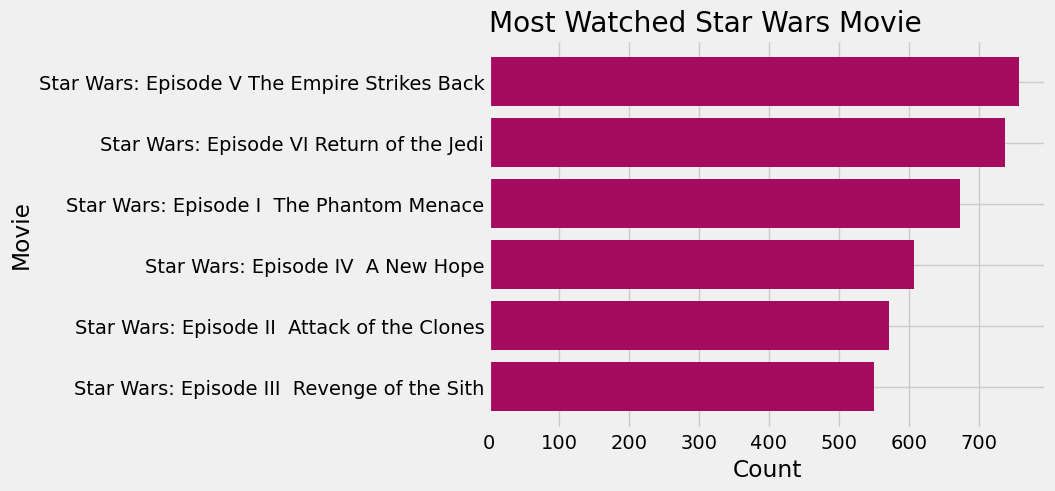

In [70]:
cleaned_most_watched = {key.replace('q1: ', ''): value for key, value in most_watched.items()}

sorted_most_watched = dict(sorted(cleaned_most_watched.items(), key=lambda item: item[1], reverse=False))

plt.style.use('fivethirtyeight')
plt.barh(list(sorted_most_watched.keys()), list(sorted_most_watched.values()), color='#a50b5e')
plt.xlabel('Count')
plt.ylabel('Movie')
plt.title('Most Watched Star Wars Movie', loc='left')
plt.show()

We can see that the Star Wars movie that was watched by most people is `The Empire Strikes Back`

**What is the top fan rated Star Wars movie?**

In [29]:
top_rated = {}

for col in sws.columns:
    if col.startswith('q2'):
        rates = sws[col].value_counts()
        rates = rates[1]
        top_rated[col] = rates

In [32]:
print(top_rated)

{'q2: Star Wars: Episode I  The Phantom Menace': 168, 'q2: Star Wars: Episode II  Attack of the Clones': 183, 'q2: Star Wars: Episode III  Revenge of the Sith': 203, 'q2: Star Wars: Episode IV  A New Hope': 161, 'q2: Star Wars: Episode V The Empire Strikes Back': 235, 'q2: Star Wars: Episode VI Return of the Jedi': 220}


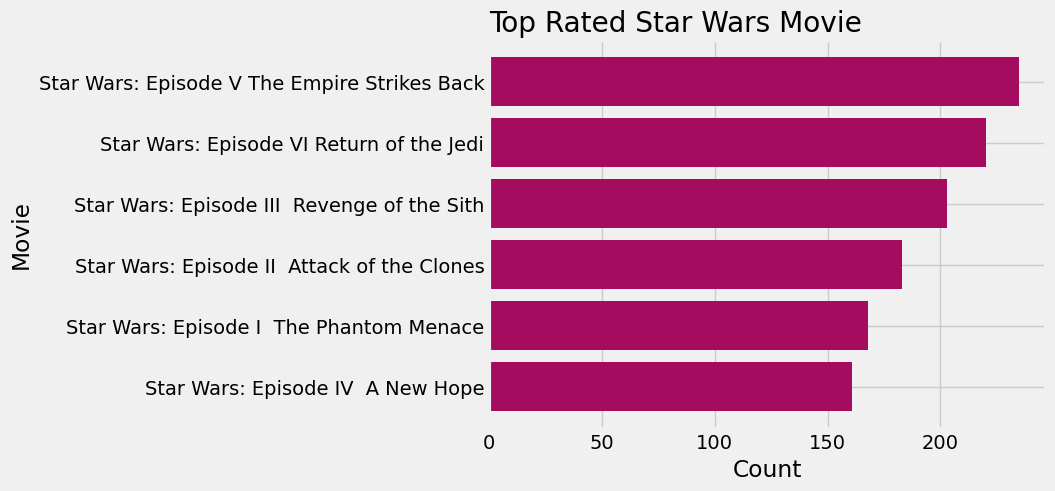

In [69]:
cleaned_top_rated = {key.replace('q2: ', ''): value for key, value in top_rated.items()}

sorted_top_rated = dict(sorted(cleaned_top_rated.items(), key=lambda item: item[1], reverse=False))

plt.style.use('fivethirtyeight')
plt.barh(list(sorted_top_rated.keys()), list(sorted_top_rated.values()), color='#a50b5e')
plt.xlabel('Count')
plt.ylabel('Movie')
plt.title('Top Rated Star Wars Movie', loc='left')
plt.show()

In [33]:
top_rated['q2: Star Wars: Episode V The Empire Strikes Back']

235

Here we can also see that `The Empire Strikes Back` is the one with the highest rating.

**Is there any characters that were introduced in `The Empire Strikes Back` and became a fan favorite?**

In [43]:
fav_char = {}

for col in sws.columns:
    if col.startswith('q3'):
        char = sws[col].value_counts().sort_values(ascending=False)
        char = char.iloc[0]
        fav_char[col] = char

In [44]:
print(fav_char)

{'q3: Han Solo': 610, 'q3: Luke Skywalker': 552, 'q3: Princess Leia Organa': 547, 'q3: Anakin Skywalker': 269, 'q3: Obi Wan Kenobi': 591, 'q3: Emperor Palpatine': 213, 'q3: Darth Vader': 310, 'q3: Lando Calrissian': 236, 'q3: Boba Fett': 248, 'q3: C-3P0': 474, 'q3: R2 D2': 562, 'q3: Jar Jar Binks': 164, 'q3: Padme Amidala': 207, 'q3: Yoda': 605}


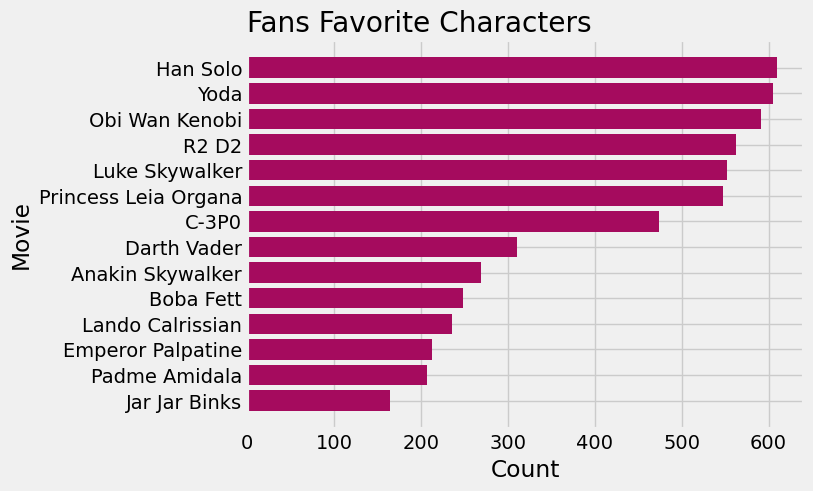

In [65]:
cleaned_fav_char = {key.replace('q3: ', ''): value for key, value in fav_char.items()}

sorted_fav_char = dict(sorted(cleaned_fav_char.items(), key=lambda item: item[1], reverse=False))

plt.style.use('fivethirtyeight')
plt.barh(list(sorted_fav_char.keys()), list(sorted_fav_char.values()), color='#a50b5e')
plt.xlabel('Count')
plt.ylabel('Movie')
plt.title('Fans Favorite Characters', loc='left')
plt.show()

Yoda was first introduced in `The Empire Strikes Back` and it seems that it became a fan favorite.

**Output**

- `The Empire Strikes Back` is the most watched movie.
- `The Empire Strikes Back` is the movie with the most highest rating.
- `Yoda` which was introduced in `The Empire Strikes Back` had an impact on the fans and became a fan's favorite.

**Conclusion**

From the survey that was conducted and the analysis provided above, we can say that `The Empire Strikes Back` is the best in the series.